In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas.tseries.offsets import Hour, Minute
from datetime import timedelta
import os
%matplotlib inline
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
from numpy.random import randn
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [3]:
x = np.random.uniform(1, 100, 1000)
y = np.log(x) + np.random.normal(0, .3, 1000)

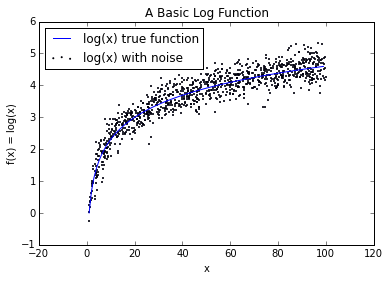

In [4]:
pl.scatter(x, y, s=1, label="log(x) with noise")
pl.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")
pl.xlabel("x")
pl.ylabel("f(x) = log(x)")
pl.legend(loc="best")
pl.title("A Basic Log Function")
pl.show()

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n    

In [7]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species
0,5.1,3.5,1.4,0.2,True,setosa
1,4.9,3.0,1.4,0.2,True,setosa
2,4.7,3.2,1.3,0.2,False,setosa
3,4.6,3.1,1.5,0.2,True,setosa
4,5.0,3.6,1.4,0.2,True,setosa


In [8]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [9]:
features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)


In [10]:
clf

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0)

In [ ]:
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

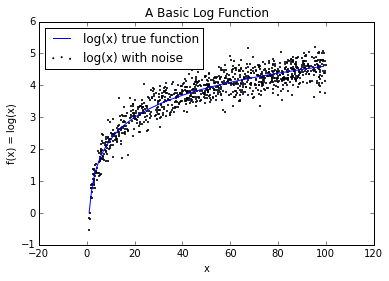

In [6]:
preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])